In [11]:
from pathlib import Path

In [28]:
import fiona
data = fiona.open("../data/shp_bdry_votingdistricts/bdry_votingdistricts_4326.shp")
data.schema

{'properties': OrderedDict([('VTDID', 'str:12'),
              ('PCTNAME', 'str:50'),
              ('PCTCODE', 'str:5'),
              ('SHORTLABEL', 'str:25'),
              ('MCDNAME', 'str:50'),
              ('MCDCODE', 'str:5'),
              ('MCDFIPS', 'str:10'),
              ('MCDGNIS', 'str:12'),
              ('CTU_TYPE', 'str:25'),
              ('COUNTYNAME', 'str:25'),
              ('COUNTYCODE', 'str:5'),
              ('COUNTYFIPS', 'str:5'),
              ('CONGDIST', 'str:2'),
              ('MNSENDIST', 'str:3'),
              ('MNLEGDIST', 'str:4'),
              ('CTYCOMDIST', 'str:2'),
              ('JUDDIST', 'str:3'),
              ('SWCDIST', 'str:5'),
              ('SWCDIST_N', 'str:35'),
              ('WARD', 'str:15'),
              ('HOSPDIST', 'str:5'),
              ('HOSPDIST_N', 'str:35'),
              ('PARKDIST', 'str:10'),
              ('PARKDIST_N', 'str:40'),
              ('Shape_Leng', 'float:19.11'),
              ('Shape_Area', 'float:19

In [29]:
data[1]

{'type': 'Feature',
 'id': '1',
 'properties': OrderedDict([('VTDID', '270910110'),
              ('PCTNAME', 'Galena Twp'),
              ('PCTCODE', '0110'),
              ('SHORTLABEL', None),
              ('MCDNAME', 'Galena Twp'),
              ('MCDCODE', '055'),
              ('MCDFIPS', '23030'),
              ('MCDGNIS', '00664240'),
              ('CTU_TYPE', 'township'),
              ('COUNTYNAME', 'Martin'),
              ('COUNTYCODE', '46'),
              ('COUNTYFIPS', '091'),
              ('CONGDIST', '1'),
              ('MNSENDIST', '23'),
              ('MNLEGDIST', '23A'),
              ('CTYCOMDIST', '5'),
              ('JUDDIST', '05'),
              ('SWCDIST', '6091'),
              ('SWCDIST_N', 'Martin'),
              ('WARD', None),
              ('HOSPDIST', None),
              ('HOSPDIST_N', None),
              ('PARKDIST', None),
              ('PARKDIST_N', None),
              ('Shape_Leng', 40275.9860636),
              ('Shape_Area', 91758759.03

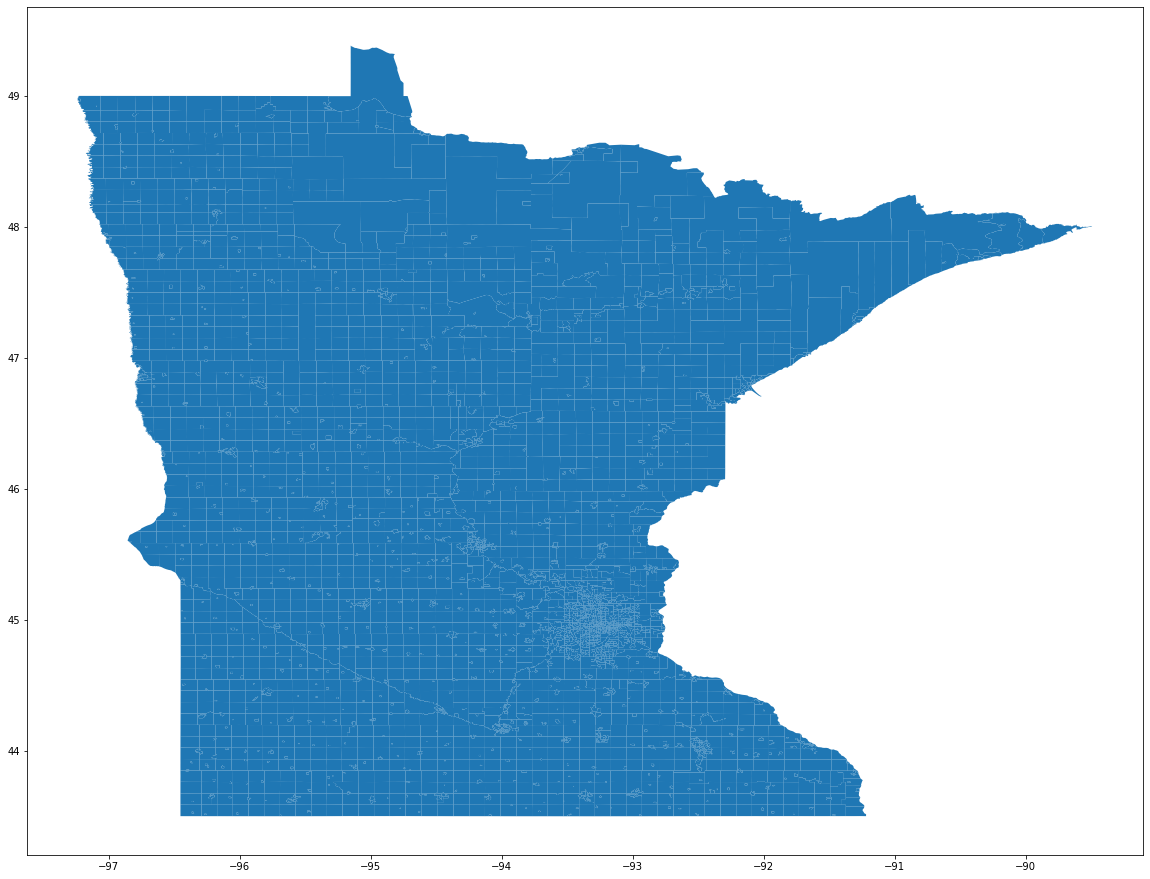

In [19]:
import geopandas as gpd
df = gpd.read_file("../data/shp_bdry_votingdistricts/bdry_votingdistricts_4326.shp")
df.plot(figsize=[20,30])

/home/bryce/.pyenv/versions/3.8.2/envs/commute/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


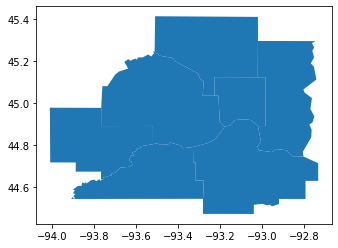

In [13]:
file = Path("../data/shp_bdry_counties_in_minnesota/mn_county_boundaries_500.shp")
data = gpd.read_file(file)
reprojected = data.to_crs("EPSG:4326")
counties = ["Anoka", "Carver", "Dakota", "Hennepin", "Ramsey", "Scott", "Washington"]
county_mask = reprojected["CTY_NAME"].isin(counties)
county_data = reprojected.loc[county_mask]
county_data.plot()

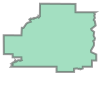

In [16]:
from shapely import wkt
from shapely.ops import cascaded_union
tc_metro = cascaded_union(county_data.geometry)
tc_metro

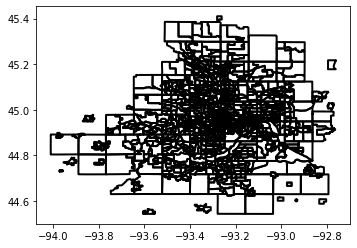

In [17]:
metro_districts = df.loc[df.geometry.apply(lambda x: tc_metro.contains(x))]
metro_districts.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2)

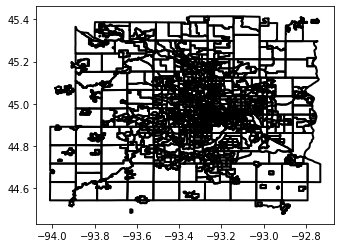

In [26]:
#something looks off with this so I will just use bounds on the metro instead to reduce number of precincts to iterate through
points = tc_metro.bounds
bounds_polygon = f"POLYGON(({points[0]} {points[1]}, {points[0]} {points[3]}, {points[2]} {points[3]}, {points[2]} {points[1]}, {points[0]} {points[1]}))"
bounds_polygon = wkt.loads(bounds_polygon)
metro_districts = df.loc[df.geometry.apply(lambda x: bounds_polygon.contains(x))]
metro_districts.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2)

In [36]:
metro_districts[["PCTCODE", "geometry"]].astype(str).values.tolist()

[['2310',
  'POLYGON ((-93.01949618086245 45.34213697013128, -93.01949645859264 45.34210568396805, -93.01951491441976 45.3400294712437, -93.01967813959713 45.33338642246625, -93.01969022575572 45.33289416443386, -93.0198655263972 45.32575841093554, -93.04035793283785 45.32589974947316, -93.06112889270358 45.32603291765759, -93.0817986448954 45.32618948885108, -93.10258597529507 45.32623274509565, -93.12314047145965 45.32622747131948, -93.14278177844197 45.32626130772572, -93.14313991919654 45.33895061319217, -93.14316496270473 45.33988372621511, -93.14318750820453 45.34075719811438, -93.14356624323715 45.35542851977665, -93.14369031667002 45.36263165817911, -93.14381530103938 45.36988562666253, -93.14331247177786 45.37496635094851, -93.14215654345428 45.38511067575109, -93.14221826058987 45.39939016452659, -93.14223001942268 45.40657603417736, -93.14218045094526 45.40657539378871, -93.14217991424167 45.40657539265651, -93.13933644060795 45.4065702689546, -93.13298159823499 45.406558561